In [1]:
using MLJ, DataFrames, Plots, Random, BenchmarkTools, VegaLite, RDatasets, Statistics
using BNN

include("BNN_analysis.jl")


(process:17936): GLib-GIO-WARNING **: 18:45:19.511: Unexpectedly, UWP app `KDEe.V.Okular_20.1202.546.0_x64__7vt06qxq7ptv8' (AUMId `KDEe.V.Okular_7vt06qxq7ptv8!KDEe.V.Okular') supports 5 extensions but has no verbs
┌ Info: Precompiling BNN [67342f8c-133f-4b03-a4b4-b75e07917245]
└ @ Base loading.jl:1342

(process:8568): GLib-GIO-WARNING **: 18:45:26.236: Unexpectedly, UWP app `KDEe.V.Okular_20.1202.546.0_x64__7vt06qxq7ptv8' (AUMId `KDEe.V.Okular_7vt06qxq7ptv8!KDEe.V.Okular') supports 5 extensions but has no verbs


test_number_layers (generic function with 2 methods)

Initial energy (log cross-entropy of the training set):936.832036926483
Final energy (log cross-entropy of the training set):39.05025705729434
Accuracy on the training set: 0.9673


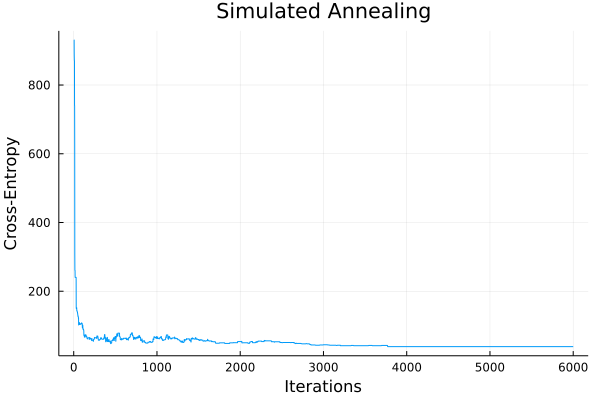

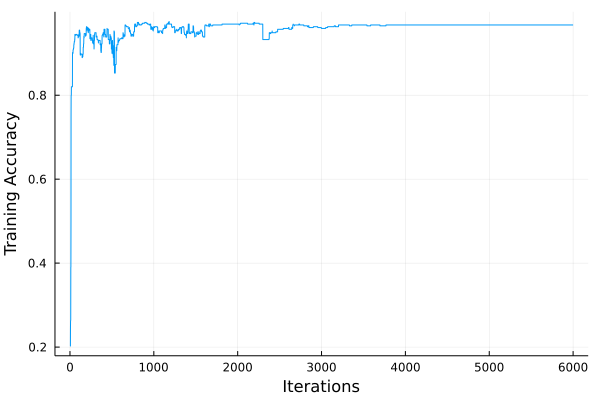

Convegence to optimum reached at 3771 iterations of Simulated Annealing


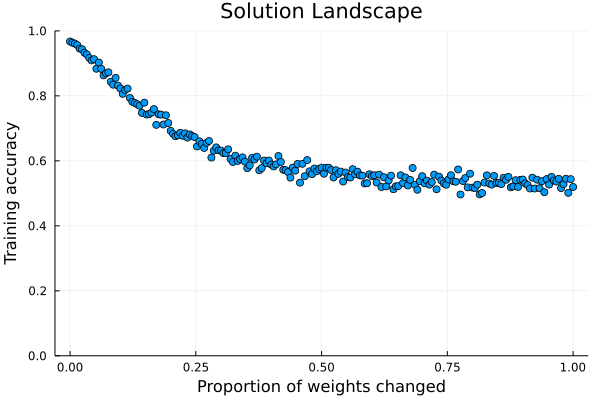

Accuracy on the test set: 0.9429


In [2]:
Random.seed!(1)
classification_dataset = dataset("MASS", "biopsy")
X = Matrix(classification_dataset)[:,2:10]
y = Matrix(classification_dataset)[:,11]
for i in 1:length(y)
    if y[i] == "benign"
        y[i] = 1
    else
        y[i] = 2
    end
end
for i in 1:length(X)
    if typeof(X[i]) == Missing
        X[i] = 0
    end
end
y = Vector{Int}(y)
train_set, test_set = partition(eachindex(y), 0.7, shuffle=true)
X_train = X[train_set,:]
y_train = y[train_set]

M = 10
H = 2
Ŵ = Weights(X_train,y,M,H)

L = 30
steps = 200
T₀ = 5
T = cooling(L,steps,T₀)
W = train(X_train,y_train,Ŵ,T,true)

X_test = X[test_set,:]
y_test = y[test_set]
ŷ_test = BNN_predict(X_test,W)
println("Accuracy on the test set: ",round(1 - misclass_error(ŷ_test,y_test), digits=4))

solution_landscape(X_train, y_train, W)

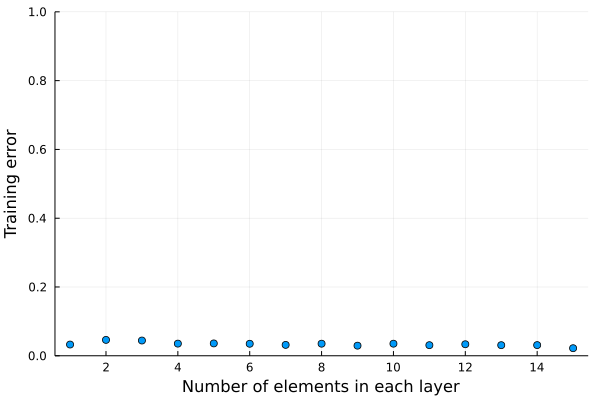

For 1 layers, Training error stabilizes at 15 elements in each layer


15

In [3]:
H = 1
max_elements = 15
optimal_elements = test_layer_elements(X_train, y_train, H, max_elements)

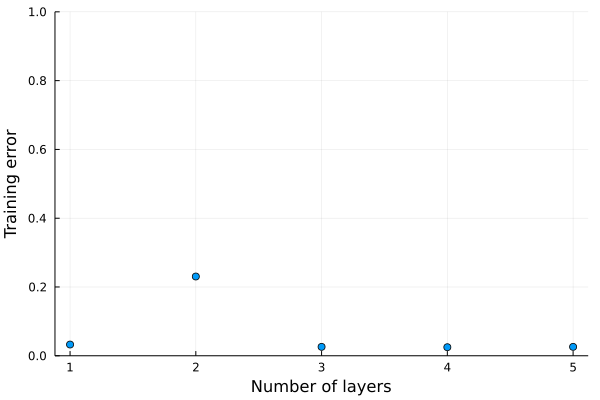

For 15 elements in each layer, Training error stabilizes at 4 layers


4

In [4]:
M = optimal_elements
max_layers = 5
test_number_layers(X_train,y_train,max_layers,M)

Initial energy (log cross-entropy of the training set):431.5652801513527
Final energy (log cross-entropy of the training set):18.363668606407646
Accuracy on the training set: 0.9333

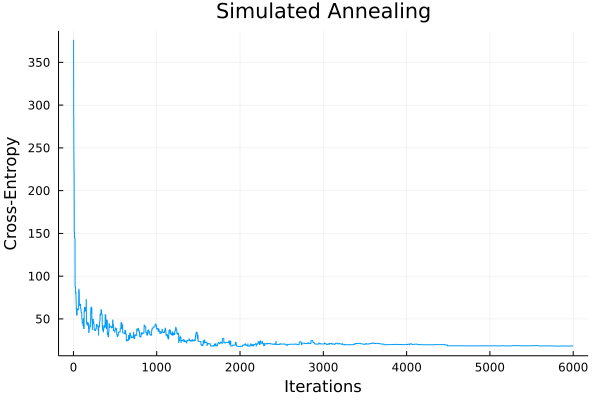

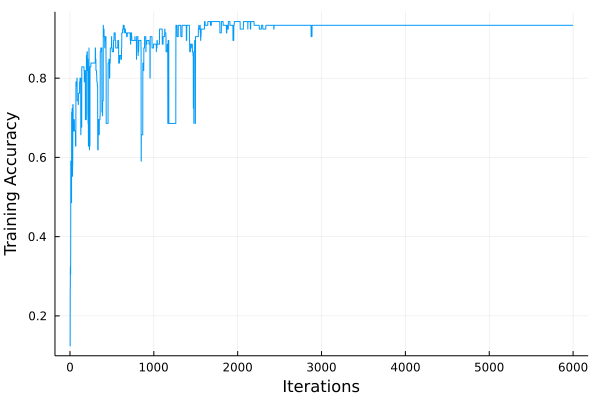

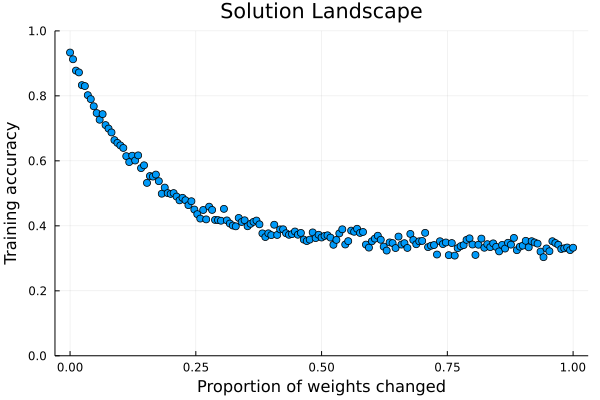


Convegence to optimum reached at 1998 iterations of Simulated Annealing
Accuracy on the test set: 0.8


In [5]:
Random.seed!(1)
iris = dataset("datasets", "iris")
X = Matrix(iris)[:,1:4]
y = Matrix(iris)[:,5]
for i in 1:length(y)
    if y[i] == "setosa"
        y[i] = 1
    elseif y[i] == "versicolor"
        y[i] = 2
    else
        y[i] = 3
    end
end
y = Vector{Int}(y)
train_set, test_set = partition(eachindex(y), 0.7, shuffle=true)
X_train = X[train_set,:]
y_train = y[train_set]

M = 10
H = 2
Ŵ = Weights(X_train,y,M,H)

L = 30
steps = 200
T₀ = 5
T = cooling(L,steps,T₀)
W = train(X_train,y_train,Ŵ,T,true)

X_test = X[test_set,:]
y_test = y[test_set]
ŷ_test = BNN_predict(X_test,W)
println("Accuracy on the test set: ",round(1 - misclass_error(ŷ_test,y_test), digits=4))

solution_landscape(X_train, y_train, W)

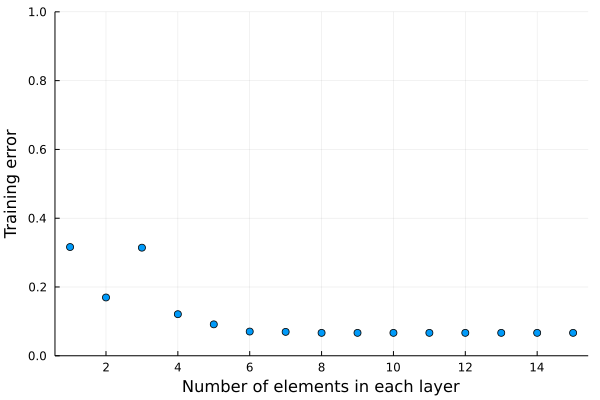

For 1 layers, Training error stabilizes at 8 elements in each layer


8

In [6]:
H = 1
max_elements = 15
optimal_elements = test_layer_elements(X_train, y_train, H, max_elements)

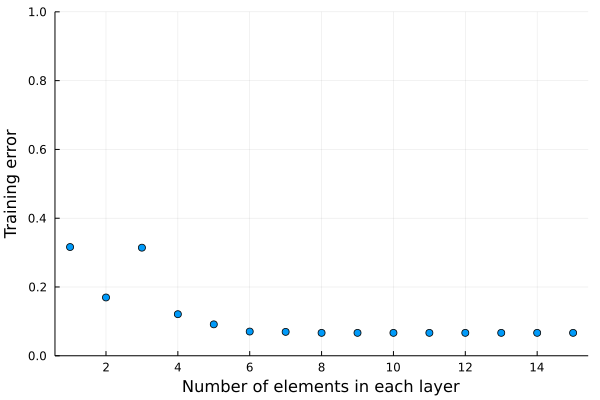

For 1 layers, Training error stabilizes at 8 elements in each layer


8

In [7]:
H = 1
max_elements = 15
optimal_elements = test_layer_elements(X_train, y_train, H, max_elements)